In [24]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use('plotting.mplstyle')
import numpy as np
np.random.seed(15)
import json
import h5py
from read_O3_LVK_results import *
from scipy.special import erf

In [25]:
# Load AR results
precomputed_data = h5py.File("./../data/ar_chi_cost_summary.hdf","r")
costs = precomputed_data['posterior/costs'][()]
f_costs = precomputed_data['posterior/f_costs'][()]
chis = precomputed_data['posterior/chis'][()]
f_chis = precomputed_data['posterior/f_chis'][()]

## 1. Assess significance of peaks in the cos-tilt and chi distributions

In [26]:
# Compute significance of a tentative peak in the cos-tilt distribution by comparing mean probabilities across
# various intervals in u=cos(theta):
# * (-0.2,0.05)
# * (0.05,0.75)
# * (0.75,1.0)

# Find indices at which `costs` most closely matches points of interest
ind_u_n02 = np.argmin(np.abs(costs-(-0.2)))
ind_u_005 = np.argmin(np.abs(costs-0.05))
ind_u_075 = np.argmin(np.abs(costs-0.75))
ind_u_10 = -1

# Integrate across `f_cost` in each band (this is proportional to the integrated probability densities)
f_u_n02_to_u_005 = np.trapz(f_costs[ind_u_n02:ind_u_005,:],costs[ind_u_n02:ind_u_005],axis=0)/(0.05-(-0.2))
f_u_005_to_u_075 = np.trapz(f_costs[ind_u_005:ind_u_075,:],costs[ind_u_005:ind_u_075],axis=0)/(0.75-0.05)
f_u_075_to_u_10 = np.trapz(f_costs[ind_u_075:ind_u_10,:],costs[ind_u_075:ind_u_10],axis=0)/(1.-0.75)

# Compute ratios of probabilities in each band, and the fraction of samples consistent with an elevated
# probability in the central band of interest
f_ratio_high = f_u_005_to_u_075/f_u_075_to_u_10
f_ratio_low = f_u_005_to_u_075/f_u_n02_to_u_005
significance_costilt_peak = f_ratio_high[(f_ratio_high>1)*(f_ratio_low>1)].size/f_ratio_high.size

In [27]:
# Compute significance of a tentative peak in the chi distribution by comparing mean probabilities across
# various intervals in chi:
# * (0,0.15)
# * (0.15,0.3)

# Find indices at which `costs` most closely matches points of interest
ind_x_000 = np.argmin(np.abs(costs-0.0))
ind_x_015 = np.argmin(np.abs(costs-0.15))
ind_x_030 = np.argmin(np.abs(costs-0.30))

# Integrate across `f_cost` in each band (this is proportional to the integrated probability densities)
f_x_000_to_x_015 = np.trapz(f_costs[ind_x_000:ind_x_015,:],costs[ind_x_000:ind_x_015],axis=0)/(0.15-0.00)
f_x_015_to_x_030 = np.trapz(f_costs[ind_x_015:ind_x_030,:],costs[ind_x_015:ind_x_030],axis=0)/(0.30-0.15)

# Compute ratios of probabilities in each band
f_ratio = f_x_015_to_x_030/f_x_000_to_x_015
significance_chi_peak = f_ratio[(f_ratio>1)].size/f_ratio.size
significance_chi_peak

0.6553333333333333

## 2. Save as latex macro

In [28]:
with open('./../macros/significance_costilt_chi_features.txt','w') as macrofile:
    
    macrofile.write("\\newcommand{{\\TiltSignificancePercentagePeak}}{{{0:.0f}\\%}}".format(\
        100.*significance_costilt_peak))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\MagnitudeSignificancePercentagePeak}}{{{0:.0f}\\%}}".format(\
        100.*significance_chi_peak))
    macrofile.write("\n")

## 3. Make plot of probability ratios

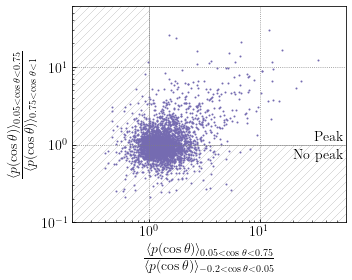

In [5]:
# Set up figure
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_rasterization_zorder(1)

# Scatter plot ratios between cos-tilt intervals
ax.scatter(f_ratio_low,f_ratio_high,s=1,color='#756bb1',zorder=0)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2,60)
ax.set_ylim(0.1,60)
ax.set_xlabel(r'$\frac{\langle p(\cos\theta)\rangle_{0.05<\cos\theta<0.75}}{\langle p(\cos\theta)\rangle_{-0.2<\cos\theta <0.05}}$',
             fontsize=20)
ax.set_ylabel(r'$\frac{\langle p(\cos\theta)\rangle_{0.05<\cos\theta<0.75}}{\langle p(\cos\theta)\rangle_{0.75<\cos\theta<1}}$',
             fontsize=20)

# Annotate
ax.text(0.99, 0.37, 'Peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.99, 0.285, 'No peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

# Shade in 'non-peak' regions
ax.fill_between([0.2,60],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.fill_betweenx([1,60],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.plot([1,1,60],[60,1,1],color='grey',zorder=-1,lw=0.5)

plt.tight_layout()
plt.savefig('figure_10.pdf',dpi=200,bbox_inches='tight')

In [3]:
# Load AR results
precomputed_data = h5py.File("./../data/ar_chi_cost_summary.hdf","r")


/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_33176/1169347753.py:20: RuntimeWarning: divide by zero encountered in true_divide
  f_ratio_high = f_x_020_to_x_025/f_x_025_to_x_035


0.6553333333333333

(array([3.000e+00, 2.500e+01, 1.000e+02, 8.240e+02, 3.167e+03, 3.080e+02,
        5.700e+01, 1.200e+01, 3.000e+00, 1.000e+00]),
 array([-0.7321394 , -0.55448735, -0.3768353 , -0.19918324, -0.02153119,
         0.15612087,  0.33377292,  0.51142498,  0.68907703,  0.86672909,
         1.04438114]),
 <BarContainer object of 10 artists>)

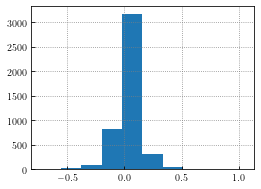

In [16]:
plt.hist(np.log10(f_ratio_low))

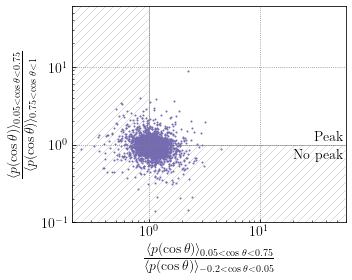

In [11]:
# Set up figure
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_rasterization_zorder(1)

# Scatter plot ratios between cos-tilt intervals
ax.scatter(f_ratio_low,f_ratio_high,s=1,color='#756bb1',zorder=0)

# Misc formatting
ax.tick_params(labelsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2,60)
ax.set_ylim(0.1,60)
ax.set_xlabel(r'$\frac{\langle p(\cos\theta)\rangle_{0.05<\cos\theta<0.75}}{\langle p(\cos\theta)\rangle_{-0.2<\cos\theta <0.05}}$',
             fontsize=20)
ax.set_ylabel(r'$\frac{\langle p(\cos\theta)\rangle_{0.05<\cos\theta<0.75}}{\langle p(\cos\theta)\rangle_{0.75<\cos\theta<1}}$',
             fontsize=20)

# Annotate
ax.text(0.99, 0.37, 'Peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.99, 0.285, 'No peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

# Shade in 'non-peak' regions
ax.fill_between([0.2,60],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.fill_betweenx([1,60],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.plot([1,1,60],[60,1,1],color='grey',zorder=-1,lw=0.5)

plt.tight_layout()